# Решающие деревья

Решающие деревья — это семейство алгоритмов, которое очень сильно отличается от линейных моделей, но
в то же время играет важную роль в машинном обучении.

### Вспоминаем линейные модели 

До этого момента изучались линейные модели. К особенностям линейных моделей относится следующее:

- **Динейные модели быстро учатся**. В случае со среднеквадратичной ошибкой для вектора весов даже есть аналитическое решение. Также легко применять для линейных моделей градиентный спуск

- При этом линейные модели **могут восстанавливать только простые зависимости** из-за ограниченного количества параметров (степеней свободы).

- В то же время линейные модели можно использовать для восстановления нелинейных зависимостей за счет перехода к полиномам n-степени, что является довольно сложной операцией.


Минус линейных моделей состоит в том, что они не могут отобразить особенность процесса принятия решений у людей. На самом деле, когда человек хочет понять ту или иную вещь, он задает последовательное количество простых вопросов, которые приведут его в какому нибудь ответу.

### Пример 1

Что бы понять принцип работы рещающих деревьев, расмотрим простой пример.

![](img/plot_1.png)

Пример очень простой, и одновременно жизненный.<br>
Пациент пришел к врачу на медицинский осмотр, при этом врач знает только два заболевания - ангина и грипп. Поэтому сначла он спрашивает, какая температура у пациента. Если меньше 37 градусов, врач говорит, чсто пациент здоров, в ином случае переходит к следующему вопросу. Врач српашивает, а не болит ли у пациента горло. Если болит, то врач ставит диагноз - Ангина, в ином случае - Грипп.

### Пример 2

Другой пример - это пример того, выживет или не выживет пассажир Титаника (Очень популярная задача на Kaggle).
Задача очень хорошо решается с применением рещающих деревьев.
<img src="img/plot_2.png" width="300px"/>
В первую очередь спрашивается пол пассажира. Если это женщина, то решающее дерево сразу заявляет,
что она выживает, и этот ответ верен в 73% случаев, и так далее.

## Решающие деревья

Мы рассмотрели два примера решающих деревьев, которые представляют собой бинарные деревья, в каждой внутреннний вершине записано условие, а в каждом листе дерева - прогноз. Необязательно рещающее дерево должно быть бинарным, но как правило используют именно бинарные.

Условия во внутренних верщинах выбираются крайне простым способом. Самый простой вариант - проверить, лежит ли значение некоторого признака $x^j$ левее, чем заданный порог $t$:
$$ [x^j\leq t]$$

Это очень простое условие которое зависит от одного признака, но его достаточно, чтобы решать многие сложные задачи.

Прозноз в листе является вещественным числом, если решается задача регрессии. Если же задача классификации, то в качестве прогноза выступает или класс или распределение вероятностей классов.

### Решающие деревья в задаче классификации

Пусть решается задача классификации с двумя признаками и тремя классами.

<img src="img/plot_3.png" width="300px"/>

Видно, что решающее дерево может очень неплохо отделить каждый класс от всех остальных. Видно,
что разделяющая поверхность каждого класса кусочно-постоянная, и при этом каждая сторона поверхности
параллельна оси координат, так как каждое условие сравнивает значение равно одного признака с порогом.

В то же время решающее дерево вполне может переобучиться: его можно сделать настолько глубоким, что
каждый лист решающего дерева будет соответствовать ровно одному объекту обучающей выборки. В этом
случае, если записать в каждом листе ответ соответствующего объекта, на обучающей выборке получается
нулевая ошибка. Дерево получается явно переобученным

<img src="img/plot_4.png" width="300px"/>

Это дерево идеально отделило синий от красного класса, но разделяющая поверхность получилась безумно
сложной — видно, что этот алгоритм переобучился и от него не будет никакой пользы на тестовой выборке.

### Решающие деревья в задаче регрессии
Пусть решается задача регрессии с одним признаком, по которому нужно восстановить значение целевой
переменной. Не очень глубокое дерево восстанавливает зависимость примерно так:

<img src="img/plot_5.png"/>

Восстановленная зависимость будет кусочно-постоянной, но в целом будет иметь неплохое качество.
При увеличении глубины дерева получившаяся функция будет иметь следующий вид:


<img src="img/plot_6.png"/>


Видно, что дерево подогналось под выбросы и его качество уже будет не таким хорошим. Дерево переобу-
чилось из-за того, что его глубина слишком большая.

## Обучение решающих деревьев
### Переобучение деревьев

Как говорилось ранее, деревья очень сильно подверженны переобучению. Дерево может "вырасти" так, что каждый лист будет соответствовать одному объекту обучающей выборки.

<img src="img/plot_4.png" width="500px"/>

Это дерево строит очень-очень сложную разделяющую поверхность и, очевидно, переобучено.

Поскольку всегда можно построить такое дерево, которое не ошибается на обучающей выборке и будет
переобученным, имеет смысл искать минимальное (например, с минимальным числом листьев) дерево из име-
ющих нулевую ошибку. Но, к сожалению, задача отыскания такого дерева – NP-полная, то есть ее невозможно
решить за разумное время.

### Жадный способ построения

Давайте выясним, как именно можно разбивать конкретную вершину на две, на два потомка. Итак, как мы с вами договаривались, мы будем использовать в качестве условия для разбиения очень простую штуку: будем брать один из признаков, $j$-тый, и сравнивать его с порогом $t$ ($[x^j\leq t])$.

Если значение $j$-того признака меньше порога, отправляем объект в одну сторону, например, влево, если больше порога, то вправо. Допустим, мы сейчас находимся в вершине m, и в нее попало некоторое количество объектов обучающей выборки, например, $X_m$, будем так обозначать это подмножество объектов. 

Мы будем использовать некоторый критерий ошибки $Q$ , который зависит от того, какие объекты
попали в данную вершину, то есть xm, и от параметров разбиения $j$ и $t$, то есть на основе какого признака мы разбиваем и с каким порогом мы сравниваем значение этого признака. 

$$ Q(X_m, j, t) - \text{критерий ошибки условия } [x^j \leq t] $$

$$ Q(X_m, j,t) \rightarrow \min_{j,t} $$


Будем выбирать параметры $j$ и $t$-разбиения так, чтобы они минимизировали данный критерий ошибки $Q$. Подбирать параметр $j$ можно перебором,поскольку признаков у нас конечное число, а из всех возможных значений параметра $t$, порога, можно рассматривать только те, при которых получаются различные разбиения. Можно показать, что этих значений $t$ столько, сколько различных значений признака $j$ на обучающей выборке. Например, можно отсортировать все значения $j$-того признака и брать пороги между этими значениями.


После того как мы выбрали конкретное разбиение, выбрали оптимальные значения параметров $j$ и $t$, мы разбиваем нашу вершину на две: левую и правую. При этом часть объектов, а именно те, на которых $j$-тый признак меньше или равен порогу $t$, отправляются влево, и будем обозначать это подмножество как $X_l$, а часть объектов из xm, те, у которых
значение $j$-того признака больше порога $t$, отправляются вправо, и это подмножество обозначается как $X_r$.

$$ X_l = { x \in X_m |[x^j \leq t]| } $$
$$ X_r = { x \in X_m |[x^j > t]| } $$


Процедуру можно продолжить для каждой из дочерних вершин: в этом случае дерево будет все больше и больше углубляться. Такой процесс рано или поздно должен остановиться, и очередная дочерняя вершина будет объявлена листком, а не разделена пополам. Этот момент определяется критерием остановки. Существует много различных вариантов критерия остановки:

- Если в вершину попал только один объект обучающей выборки или все объекты принадлежат одному классу (в задачах классификации), дальше разбивать не имеет смысла.
- Можно также останавливать разбиение, если глубина дерева достигла определенного значения.

Давайте обсудим, как выбирать ответ в листе, если мы решили вершину объявить листом. Итак, в данный лист попала некоторая подвыборка $X_m$, некоторое подмножество объектов обучающей выборки, и нужно выбрать какой-то один прогноз, который будет оптимален для данной подвыборки.

В случае с регрессией мы знаем, что если функционал – среднеквадратичная ошибка, то оптимально выдавать средний ответ по этой подвыборке, то есть мы суммируем ответы по всем объектам i, которые попали в данную вершину, и делим на количество объектов в этой вершине. 

$$ a_m = \frac{1}{|X_m|} \sum\limits_{i \in X_m} y_i $$

Это и будет оптимальным прогнозом в случае с задачей регрессии среднеквадратичного функционала. 

Если мы решаем задачу классификации, то наиболее логичным выбором будет возвращать тот класс, который наиболее популярен в выборке $X_m$. То есть мы для каждого класса $y$ считаем, сколько объектов этого класса попало в данную вершину, и возвращаем тот, который максимален, которого больше всего. 

$$ a_m = \text{argmax}_{y \in X_m} \sum\limits_{i \in X_m}[y_i=y] $$


Если же мы хотим возвращать вероятности классов в данной вершине, это тоже очень легко сделать. 

$$ a_mk = \frac{1}{|X_m|} \sum\limits_{i \in X_m}[y_i = k]  $$

Вероятность $k$-того класса оценивается как доля объектов $k$-того класса в данной вершине среди всех объектов, впавших в эту вершину, то есть среди всех объектов из xm.



## Критерии информативности
### Выбор критерия ошибки
Критерий ошибки записывается следующим образом:

$$ Q(X_m, j,t) = \frac{|X_l|}{|X_m|}H(X_l) + \frac{|X_r|}{|X_m|}H(X_r)  
$$
 
Функция $H$ должна измерять качество этого подмножества, то есть насколько сильный разброс ответов имеет место при попадании выборки $X_l$ в левое поддерево. Аналогично второе слагаемое измеряет то же самое для правого поддерева, в нем функцию $H$ передает выборка $X_r$, и она должна измерить, насколько силен разброс ответов в подмножестве $X_r$.

Обратите внимание, что значение функции $H$ на $X_l$ и $X_r$ **нормируется**, они домножаются на коэффициенты, которые равны доли объектов, которая идет влево, и доли объектов, которая идет вправо.

**Зачем это нужно?**

Представьте, что у нас в вершине m находится 1000 объектов, и из них 990 идут в левое поддерево, и 10 — в правое поддерево. При этом 990 объектов, которые идут влево, оказываются одного класса, то есть это очень хорошее поддерево, а 10 объектов, которые идут вправо, относятся ко всем возможным классам.

Распределение классов там равномерное, то есть эта подвыборка получается  плохой, но при этом в ней всего 10 объектов, и нам не так страшно, что она получилась плохой, при том, что 990 попали в правильную вершину.
Поэтому нам важно домножать значение качества подмножества на размер этого подмножества.
 

Функция $H(X)$ - это критерий информативности. И она должна измерять, насколько силен разброс ответов в выборке X. По сути, эта функция зависит от того, какие ответы имеют объекты из множества X. Ее значение должно быть тем меньше, чем меньше разброс этих ответов.

В случае **регрессии** разброс ответов - это дисперсия, поэтому критерий информативности в задачах регрессии записывается следующим образом:

$$ H(X) = \frac{1}{|X|} \sum \limits_{i \in X} (y_i - \overline{y}(X))^2 $$

$$ \bar y = \frac{1}{|X|} \sum \limits_{i \in X} y_i  $$

В случае с регрессией измерить разброс довольно просто — это просто дисперсия ответов этой выборки. Чтобы ее измерить, сначала вычислим средний ответ выборки X, который обозначается буквой y с верхней чертой.
Он вычисляется просто, как среднее значение.
А затем вычислим дисперсию выборки, которая вычисляется как среднее значение квадрата отклонения ответа на объекте от среднего ответа по выборке.

В случае с **классификацией** все немного сложнее.
#### Критерий информативности Джини
Нам понадобится вспомогательная величина, которая показывает для $k$-го класса, какова доля объектов класса $k$ в выборке $X$. Будем обозначать эту величину как $p_k$-тое. 


$$ H(X) = \sum \limits_{k=1}{K} y_i  $$

И она, собственно, вычисляется по этой формуле, смысл которой как раз таки доля объектов класса $k$ в выборке $X$.

На основе этих чисел $p_k$ вводятся критерии информативности для классификации, и первый из них — **это критерий Джини**. Он вычислется по формуле выше.

В нем стоит сммирование по всем классам, от первого до К, и для каждого класса вычисляется произведение $p_k$ на $(1-p_k)$ где $p_k$ — это доля объектов $k$-го класса в вершине.

Обратите внимание, что все числа в этой сумме положительные, поэтому критерий Джини всегда не отрицательный, он не меньше нуля.

При этом, если в нашей выборке X все объекты относятся к какому-то одному классу, например к первому, то все слагаемые в этой сумме будут нулевыми, значит и сам критерий Джини будет равен 0.

Это означает, что его оптимум достигается в том случае, если все объекты в подвыборке относятся к одному классу.

У него есть много интерпретаций.
Вот одна из множеств.

**Критерий Джини** равен вероятности ошибки случайного классификатора, где случайный классификатор устроен так, что он выдает случайный класс от 1 до K, при этом вероятность выдать класс (какое-то $k$) равна $p_k$, то есть равна пропорции этого класса в общей подвыборке $X$

#### Энтропийный критерий информативности

Еще один пример критерия информативности для классификации, это энтропийный критерий.

Он вычисляется по такой формуле.
$$ H(X) = -  \sum \limits_{k=1}{K} p_k ln p_k $$

В нем суммируются следующие слагаемые: берется вероятность $p_k$ и домножается на логарифм этой вероятности, и все это берется со знаком минус.

$$ 0 ln 0 = 0  $$ 
При этом мы считаем, что если вероятность равна 0, то ноль умножить на логарифм нуля — это то же ноль. 

Для этого критерия выполнено то же самое свойство: если в выборке X находятся объекты ровно одного класса, например первого, то значение энтропийного критерия будет равно 0. И какое бы не было распределение на классах, значение энтропийного критерия не отрицательное. У него так же есть очень интересный физический смысл.


По сути,энтропийный критерий — это мера отличия распределения классов от вырожденного.

Если распределение вырожденное, то энтропия равна 0, в этом распределении нет ничего неожиданного, мы всегда знаем, что мы будем получать из него. Если же это распределение равномерное, то есть вероятность получить каждый класс в этой выборке одинаковая, то энтропия будет максимальна. У этого распределения максимальный уровень неожиданности.
Мы не можем предсказать, что мы получим.
 

 

## Критерий останова и стрижка деревьев.

#### Критерий останова

Критерий останова используется, чтобы принять решение: разбивать вершину дальше или сделать листовой.

**Худший случай решающего дерева** — такое, в котором каждый лист соответствует своему объекту обучающей выборки. В этом случае дерево будет максимально переобученным и не будет обобщать информацию, полученную из обучающей выборки. Грамотно подобранный критерия останова позволяет бороться с переобучением.

Самый простой критерий останова проверяет, все ли объекты в вершине относятся к одному классу.

Однако такой критерий останова может быть использован только в случае простых выборок, так как для сложных он остановится только тогда, когда в каждом листе останется примерно по одному объекту.

Гораздо более устойчивый и полезный критерий проверяет, сколько объектов оказалось в вершине, и
разбиение продолжается, если это число больше, чем некоторое выбранное $n$. Соответственно, если в вершину
попало $≤ n$ объектов, она становится листовой. <br>
Параметр $n$ нужно подбирать.

Случай $ n=1 $ является худшим случаем, описанным выше. При этом выбирать $n$ нужно так, чтобы по $n$ объектам, которые попали в вершину, можно было устойчиво построить прогноз. Существует рекомендация, что $n$ нужно брать равным 5.

Еще один критерий, гораздо более грубый, заключается в ограничении на глубину дерева. Этот критерий
хорошо себя зарекомендовал при построении композиций, когда много решающих деревьев объединяют в один сложный алгоритм. Об этом пойдет речь позже.


#### Стрижка деревьев


Существует и другой подход к борьбе с переобучением деревьев — стрижка. Он заключается в том, что сначала строится решающее дерево максимальной сложности и глубины, до тех пор, пока в каждой вершине не окажется по 1 объекту обучающей выборки.

После этого начинается «стрижка», то есть удаление листьев в этом дереве по определенному критерию.

Например, можно стричь до тех пор, пока улучшается качество некоторой отложенной выборки.

Существует мнение, и это подкреплено многими экспериментами, что стрижка работает гораздо лучше, чем простые критерии, о которых говорилось раньше. Но стрижка — очень ресурсоёмкая процедура, так как, например, может потребоваться вычисление качества дерева на некоторой валидационной выборке на каждом шаге.

На самом деле, сами по себе деревья на сегодняшний день почти не используются, они бывают нужны только для построения композиции и объединения большого числа деревьев в один алгоритм. В случае с композициями такие сложные подходы к борьбе с переобучением уже не нужны, так как достаточно простых критериев останова, ограничения на глубину дерева или на число объектов в листе.


# Перейдем к написанию кода.

Рассмотрим пример применения дерева решений из библиотеки Scikit-learn для синтетических данных. Сгенерируем данные. Два класса будут сгенерированы из двух нормальных распределений с разными средними.

In [2]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
# первый класс
np.random.seed(7)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей красивой визуализации.


In [4]:
def get_grid(data, eps=0.01):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, eps),
                         np.arange(y_min, y_max, eps))

Отобразим данные.<br>
Неформально, задача классификации в этом случае – построить какую-то "хорошую" границу, разделяющую 2 класса (красные точки от желтых).<br>
Если утрировать, то машинное обучение в этом случае сводится к тому, как выбрать хорошую разделяющую границу.<br>
Возможно, прямая будет слишком простой границей, а какая-то сложная кривая, огибающая каждую красную точку – будет слишком сложной и будем много ошибаться на новых примерах из того же распределения, из которого пришла обучающая выборка.

Интуиция подсказывает, что хорошо на новых данных будет работать какая-то гладкая граница, разделяющая 2 класса, или хотя бы просто прямая (в n-мерном случае - гиперплоскость).

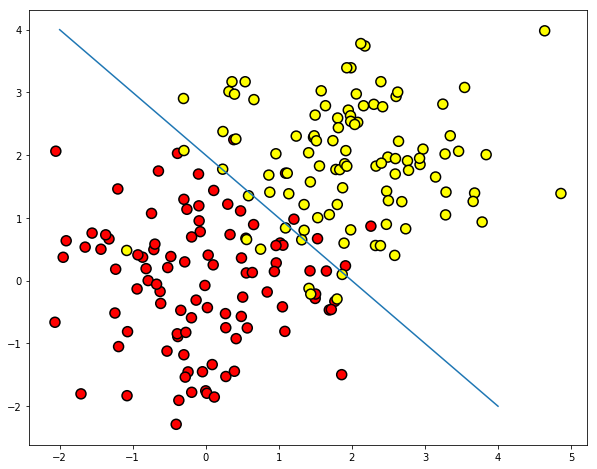

In [5]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5)
plt.plot(range(-2,5), range(4,-3,-1));

Класс **DecisionTreeClassifier** в Scikit-learn

Основные параметры класса sklearn.tree.DecisionTreeClassifier:

    max_depth – максимальная глубина дерева
    max_features - максимальное число признаков, по которым ищется лучшее разбиение в дереве (это нужно потому, что при большом количестве признаков будет "дорого" искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков)
    min_samples_leaf – минимальное число объектов в листе. У этого параметра есть понятная интерпретация: скажем, если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как мимимум для 5 объектов

Параметры дерева надо настраивать в зависимости от входных данных, и делается это обычно с помощью кросс-валидации, про нее чуть ниже.

Попробуем разделить эти два класса, обучив дерево решений. В дереве будем использовать параметр **max_depth**, ограничивающий глубину дерева. Визуализируем полученную границу разделения класссов.

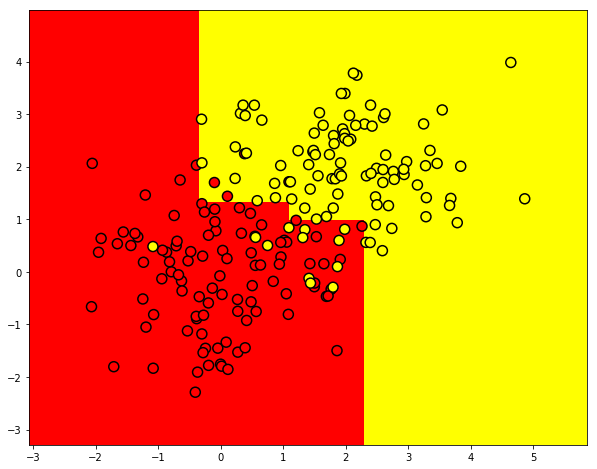

In [6]:
from sklearn.tree import DecisionTreeClassifier

# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# обучаем дерево
clf_tree.fit(train_data, train_labels)

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);

А как выглядит само построенное дерево? Видим, что дерево "нарезает" пространство на 7 прямоугольников (в дереве 7 листьев). В каждом таком прямоугольнике прогноз дерева будет константным, по превалированию объектов того или иного класса.


In [7]:
# используем .dot формат для визуализации дерева
from sklearn.tree import export_graphviz
export_graphviz(clf_tree, feature_names=['x1', 'x2'], 
                out_file='small_tree.dot', filled=True)

После чего может понадобится установка Graphviz для оторажения диограм решающего дерева.

Arch 
```bash
sudo pacman -S Graphviz
```
Ubuntu 
```bash
sudo apt-get install graphviz
```
MacOS 

```bash
  brew install graphviz
```
Windows https://graphviz.gitlab.io/_pages/Download/Download_windows.html


После загрузки ставим python package

```bash
pip install graphviz
```

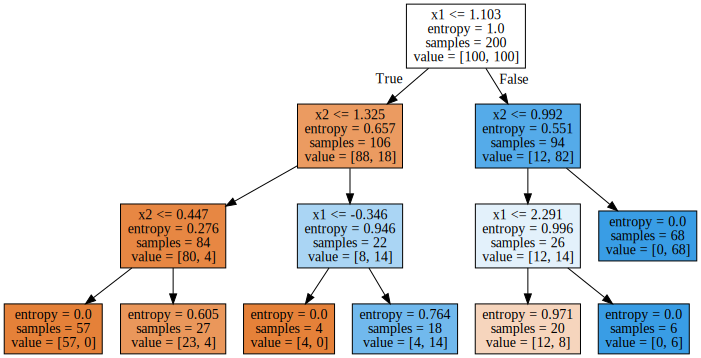

In [8]:
import graphviz 
with open("small_tree.dot") as f:
    dot_graph = f.read() 
graphviz.Source(dot_graph)


Как "читается" такое дерево?

В начале было 200 объектов, 100 – одного класса и 100 – другого. Энтропия начального состояния была максимальной – 1. Затем было сделано разбиение объектов на 2 группы в зависимости от сравнения признака x1
со значением 1.1034 (найдите этот участок границы на рисунке выше, до дерева). При этом энтропия и в левой, и в правой группе объектов уменьшилась. И так далее, дерево строится до глубины 3. При такой визуализации чем больше объектов одного класса, тем цвет вершины ближе к темно-оранжевому и, наоборот, чем больше объектов второго класса, тем ближе цвет к темно-синему. В начале объектов одного лкасса поровну, поэтому корневая вершина дерева – белого цвета.

#### Как дерево решений работает с количественными признаками

Допустим, в выборке имеется количественный признак "Возраст", имеющий много уникальных значений. Дерево решений будет искать лучшее (по критерию типа прироста информации) разбиение выборки, проверяя бинарные признаки типа "Возраст < 17", "Возраст < 22.87" и т.д. Но что если таких "нарезаний" возраста слишком много? А что если есть еще количественный признак "Зарплата", и зарплату тоже можно "нарезать" большим числом способов? Получается слишком много бинарных признаков для выбора лучшего на каждом шаге построения дерева. Для решения этой проблемы применяют эвристики для ограничения числа порогов, с которыми мы сравниваем количественный признак.

Рассмотрим это на игрушечном примере. Пусть есть следующая выборка:


In [9]:
data = pd.DataFrame({'Возраст': [17,64,18,20,38,49,55,25,29,31,33], 
             'Невозврат кредита': [1,0,1,0,1,0,0,1,1,0,1]})

In [10]:
data

,Возраст,Невозврат кредита
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


Отсортируем ее по возрастанию возраста.


In [11]:
data.sort_values('Возраст')

,Возраст,Невозврат кредита
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


Обучим на этих данных дерево решений (без ограничения глубины) и посмотрим на него.


In [12]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data['Возраст'].values.reshape(-1, 1), data['Невозврат кредита'].values)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

Видим, что дерево задействовало 5 значений, с которыми сравнивается возраст: 43.5, 19, 22.5, 30 и 32 года. Если приглядеться, то это аккурат средние значения между возрастами, при которых целевой класс "меняется" с 1 на 0 или наоборот. Сложная фраза, поэтому пример: 43.5 – это среднее между 38 и 49 годами, клиент, которому 38 лет не вернул кредит, а тот, которому 49 – вернул. Аналогично, 19 лет – среднее между 18 и 20 годами. То есть в качестве порогов для "нарезания" количественного признака, дерево "смотрит" на те значения, при которых целевой класс меняет свое значение.

In [13]:
export_graphviz(age_tree, feature_names=['Возраст'], 
                out_file='img/age_tree.dot', filled=True)

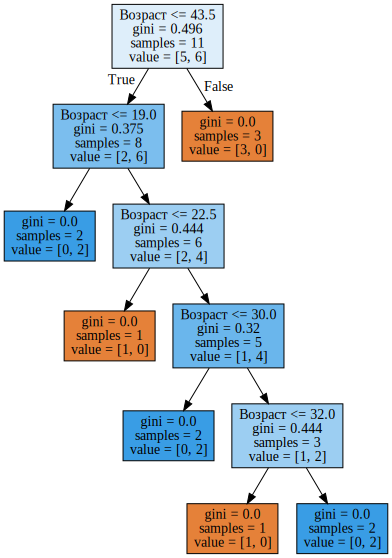

In [14]:
import graphviz 
with open("img/age_tree.dot") as f:
    dot_graph = f.read() 
graphviz.Source(dot_graph)


Рассмотрим пример посложнее: добавим признак "Зарплата" (тыс. рублей/месяц).


In [15]:
data2 = pd.DataFrame({'Возраст':  [17,64,18,20,38,49,55,25,29,31,33], 
                      'Зарплата': [25,80,22,36,37,59,74,70,33,102,88], 
             'Невозврат кредита': [1,0,1,0,1,0,0,1,1,0,1]})

In [16]:
data2

,Возраст,Зарплата,Невозврат кредита
0,17,25,1
1,64,80,0
2,18,22,1
3,20,36,0
4,38,37,1
5,49,59,0
6,55,74,0
7,25,70,1
8,29,33,1
9,31,102,0


In [17]:
data2.sort_values('Возраст')

,Возраст,Зарплата,Невозврат кредита
0,17,25,1
2,18,22,1
3,20,36,0
7,25,70,1
8,29,33,1
9,31,102,0
10,33,88,1
4,38,37,1
5,49,59,0
6,55,74,0


In [18]:
data2.sort_values('Зарплата')

,Возраст,Зарплата,Невозврат кредита
2,18,22,1
0,17,25,1
8,29,33,1
3,20,36,0
4,38,37,1
5,49,59,0
7,25,70,1
6,55,74,0
1,64,80,0
10,33,88,1


In [19]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[['Возраст', 'Зарплата']].values, data2['Невозврат кредита'].values);

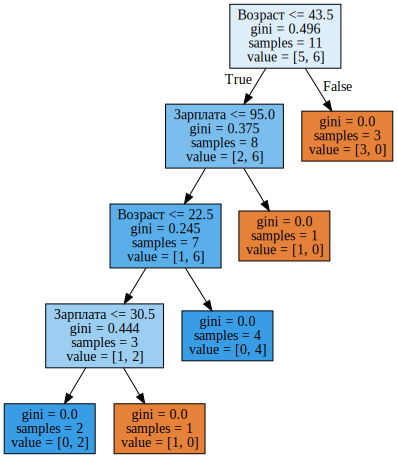

In [20]:
export_graphviz(age_sal_tree, feature_names=['Возраст', 'Зарплата'], 
                out_file='img/age_sal_tree.dot', filled=True)
import graphviz 
with open("img/age_sal_tree.dot") as f:
    dot_graph = f.read() 
graphviz.Source(dot_graph)

Видим, что в дереве задействованы как разбиения по возрасту, так и по зарплате. Причем пороги, с которыми сравниваются признаки: 43.5 и 22.5 года – для возраста и 95 и 30.5 тыс. руб/мес – для зарплаты. И опять можно заметить, что 95 тыс. – это среднее между 88 и 102, при этом человек с зарплатой 88 оказался "плохим", а с 102 – "хорошим". То же самое для 30.5 тыс. То есть перебирались сравнения зарплаты и возраста не со всеми возможными значениями, а только с несколькими. А почему в дереве оказались именно эти признаки? Потому что по ним разбиения оказались лучше (по критерию неопределенности Джини).

**Вывод:** самая простая эвристика для обработки количественных признаков в дереве решений: количественный признак сортируется по возрастанию, и в дереве проверяются только те пороги, при которых целевой признак меняет значение. Звучит не очень строго, но надеюсь, я донес смысл с помощью игрушечных примеров.

Дополнительно, когда в данных много количественных признаков, и у каждого много уникальных значений, могут отбираться не все пороги, описанные выше, а только топ-N, дающих максимальный прирост все того же критерия. То есть, по сути, для каждого порога строится дерево глубины 1, считается насколько снизилась энтропия (или неопределенность Джини) и выбираются только лучшие пороги, с которыми стоит сравнивать количественный признак.

Для иллюстрации: при разбиении по признаку "Зарплата ≤
34.5" в левой подгруппе энтропия 0 (все клиенты "плохие"), а в правой – 0.954 (3 "плохих" и 5 "хороших", можете проверить, 1 часть домашнего задания будет как раз на то, чтоб разобраться досканально с построением деревьев). Прирост информации получается примерно 0.3. А при разбиении по признаку "Зарплата ≤ 95" в левой подгруппе энтропия 0.97 (6 "плохих" и 4 "хороших"), а в правой – 0 (всего один объект). Прирост информации получается примерно 0.11. Посчитав таким образом прирост информации для каждого разбиения, можно предварительно, до построения большого дерева (по всем признакам) отобрать пороги, с которыми будет сравниваться каждый количественный признак.

### Дерево решений в задаче регрессии

Сгенерируем данные, распределенные вокруг функции $f(x)=e^{−x^2}+1.5∗ e^{−(x−2)^2}$ c некоторым шумом.

In [21]:
n_train = 150        
n_test = 1000       
noise = 0.1


def f(x):
    x = x.ravel()

    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
        np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

In [24]:
from sklearn.tree import DecisionTreeRegressor
     
reg_tree = DecisionTreeRegressor(max_depth=4, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

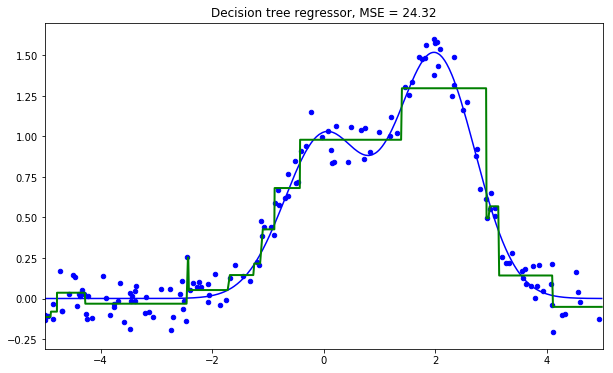

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

### Сложный случай для деревьев

В продолжение обсуждения плюсов и минусов приведем очень простой пример задачи классификации, с которым дерево справляется, но делает все как-то "сложнее", чем хотелось бы. Создадим множество точек на плоскости (2 признака), каждая точка будет относиться к одному из классов (+1, красные, или -1 – желтые). Если смотреть на это как на задачу классификации, то вроде все очень просто – классы разделяются прямой.

In [26]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1, x2 = np.random.randint(x1_min, x1_max), np.random.randint(x2_min, x2_max)
        
        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)

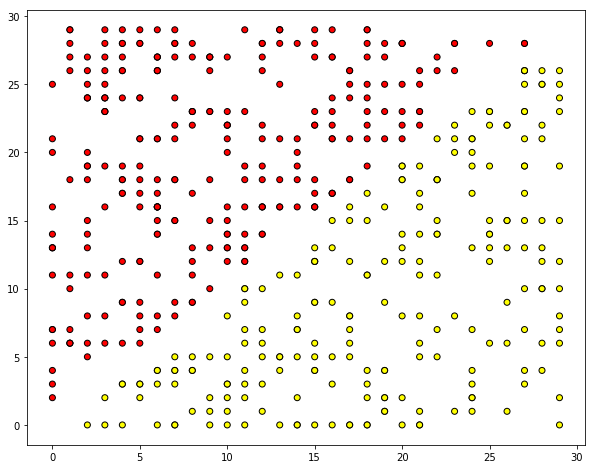

In [27]:
X, y = form_linearly_separable_data()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black');

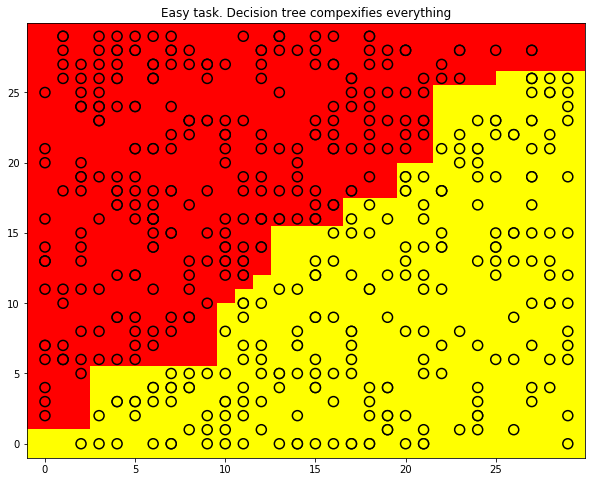

In [34]:
tree = DecisionTreeClassifier(random_state=17).fit(X, y)
xx, yy = get_grid(X, eps=.05)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5)
plt.title('Easy task. Decision tree compexifies everything');


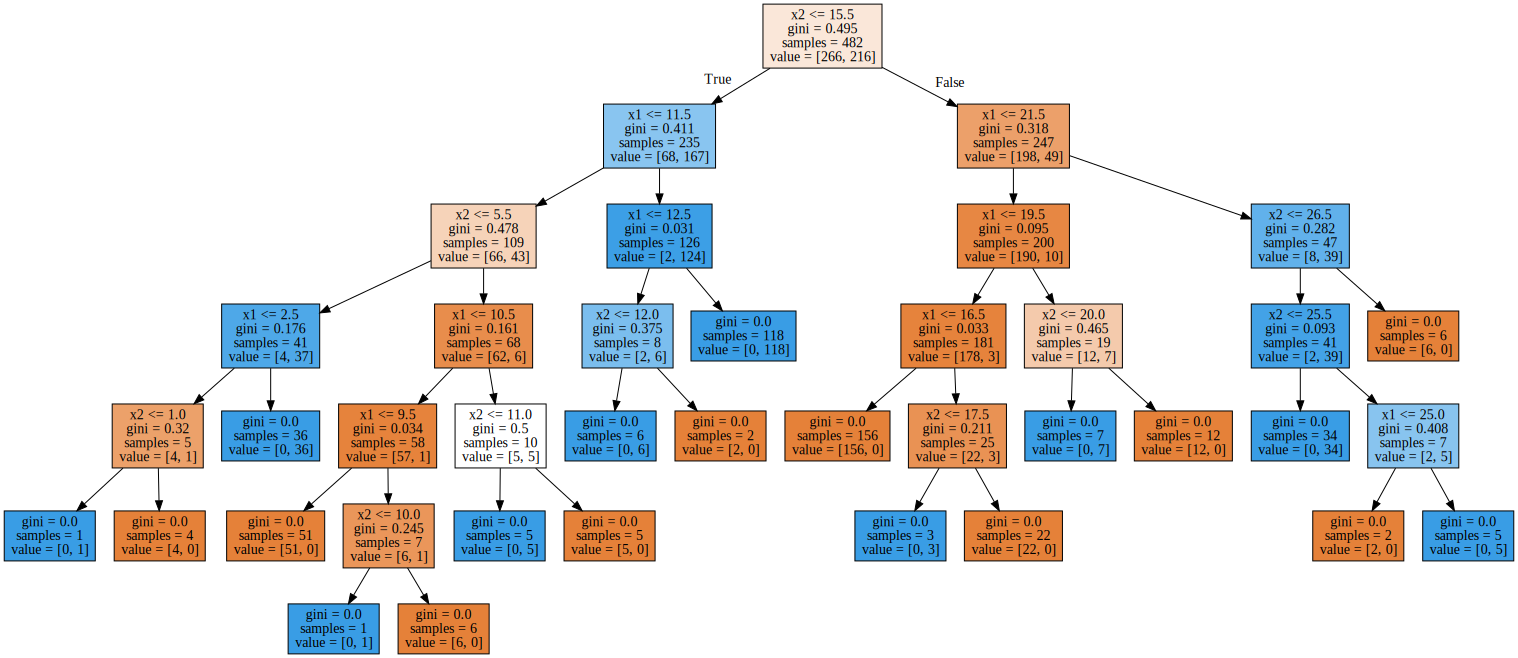

In [35]:
export_graphviz(tree, feature_names=['x1', 'x2'], 
                out_file='img/deep_toy_tree.dot', filled=True)

with open("img/deep_toy_tree.dot") as f:
    dot_graph = f.read() 
graphviz.Source(dot_graph)

In [36]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e4, solver='lbfgs', multi_class='multinomial', max_iter=10000)

result = logreg.fit(X, y)

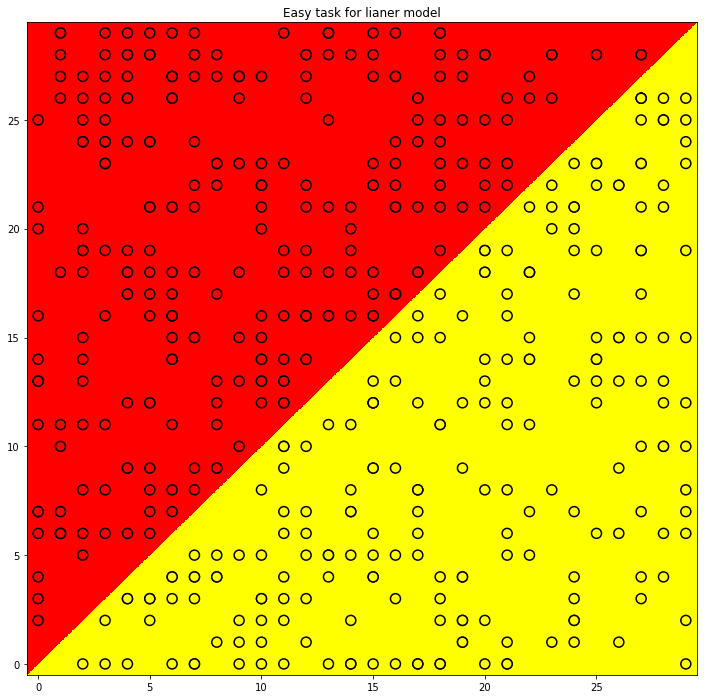

In [41]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.figure(1, figsize=(12, 12))

predicted = logreg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5)

plt.title('Easy task for lianer model');


plt.show()